In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os

In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
from QubitRBM.rbm import *
from QubitRBM.optimize import *
from QubitRBM.exact_gates import H

In [4]:
nv = 10
nh = 4*nv

In [5]:
logpsi = RBM(nv, nh)

In [6]:
logpsi.rand_init_weights()

In [7]:
n = np.random.randint(low=0, high=nv)

In [8]:
n

6

In [9]:
psi0 = logpsi.get_state_vector(log=False, normalized=True)
phi = H(n=n, n_qubits=nv).dot(psi0)

Initial fidelity:

In [10]:
utils.exact_fidelity(psi0, phi)

0.32146058822433631885

Run the optimizer and track the progress:

In [11]:
a, b, W, fidelities = hadamard_optimization(logpsi, n, tol=1e-6, mcmc_params=(500,100,1),
                                            fidelity='mcmc', lr_min=0.003, verbose=True)

Iteration 81 | Fidelity = 0.7564734273597972 | lr = 0.008298507675144225
Iteration 170 | Fidelity = 0.9450445217060266 | lr = 0.0067608297539198175
Iteration 257 | Fidelity = 0.9619860719623208 | lr = 0.005533501092157367
Iteration 347 | Fidelity = 0.982710479239573 | lr = 0.004497798548932879
Iteration 434 | Fidelity = 1.0109381105400514 | lr = 0.003681289736425314
Iteration 524 | Fidelity = 0.9923784533897296 | lr = 0.003


Final fidelity:

In [12]:
logpsi.set_params(a, b, W)

In [13]:
psi = logpsi.get_state_vector(log=False, normalized=True)

In [14]:
utils.exact_fidelity(psi, phi)

0.9957495137427726517

Plot the optimizer progress:

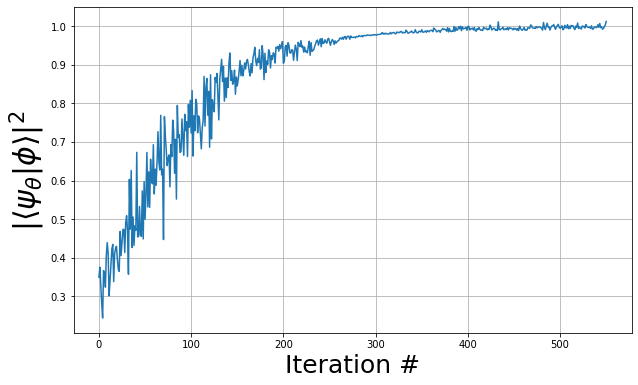

In [17]:
fig, ax = plt.subplots(figsize=[10,6])

ax.grid()
ax.plot(fidelities)
ax.set_xlabel('Iteration #', fontsize=25)
_ = ax.set_ylabel(r'$\vert \langle \psi _\theta \vert \phi \rangle \vert^2 $', fontsize=30)